---
# Assignment 4: Introduction to Image processing
---

## Student Information
```text

Name: Ahmed Monir Almassri --- Student ID: 120220138  --- Date: 1/15/2026  

In [13]:
import sys
print(sys.executable)

c:\Users\ahmad\anaconda3\envs\cv_dl_lab\python.exe


## Import Required Libraries

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

## Q1: Image Translation
Load an flower image. Apply a translation of `(tx = 120, ty = 80)` using a manual transformation matrix. Display both the original and the translated images side by side.  
**Question:** What happens to pixels that move outside the image boundaries? How does OpenCV handle them?

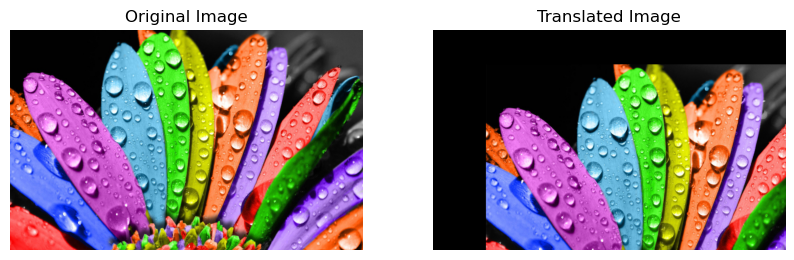

In [15]:
# Q1 Solu

# Load the flower image
img = cv2.imread('flower.jpg')

# Convert BGR to RGB for correct display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get image dimensions
h, w, _ = img_rgb.shape

# Manual transformation matrix for translation
tx, ty = 120, 80
T = np.float32([
    [1, 0, tx],
    [0, 1, ty]
])

# Apply translation
translated_img = cv2.warpAffine(img_rgb, T, (w, h))

# Display original and translated images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Translated Image")
plt.imshow(translated_img)
plt.axis("off")

plt.show()

## Answer of Question 1

Applying a translation of (tx = 120, ty = 80) shifts all pixels to the right and downward.
Pixels that move outside the image boundaries are discarded.
The empty areas in the output image are filled with **black pixels**  by default in OpenCV (BORDER_CONSTANT).
No wrapping occurs unless explicitly specified.

## Q2: Image Rotation
Rotate the same image by `45°` around its center using `cv2.getRotationMatrix2D`. Then rotate it by `-30°` with a scale of `0.8`. Display the two results.  

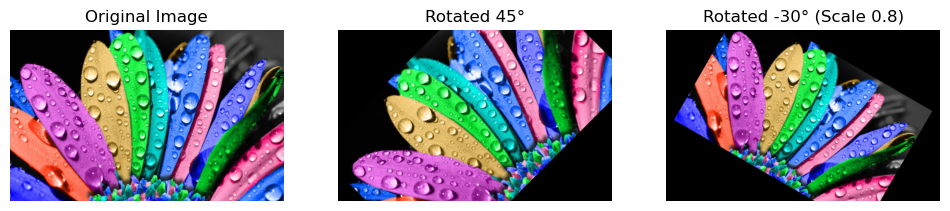

In [16]:
# Write your code here

# Get image dimensions and center
h, w, _ = img.shape
center = (w // 2, h // 2)

# Rotation 1: 45 degrees around center
M1 = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_45 = cv2.warpAffine(img, M1, (w, h))

# Rotation 2: -30 degrees with scale 0.8
M2 = cv2.getRotationMatrix2D(center, -30, 0.8)
rotated_minus30 = cv2.warpAffine(img, M2, (w, h))

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Rotated 45°")
plt.imshow(rotated_45)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Rotated -30° (Scale 0.8)")
plt.imshow(rotated_minus30)
plt.axis("off")

plt.show()

## Q3: Manual Mean Filter
Load `walking.jpg` in grayscale. Implement a **manual 7×7 mean filter**. Measure the execution time using `%time`. Display the filtered image.

CPU times: total: 0 ns
Wall time: 0 ns


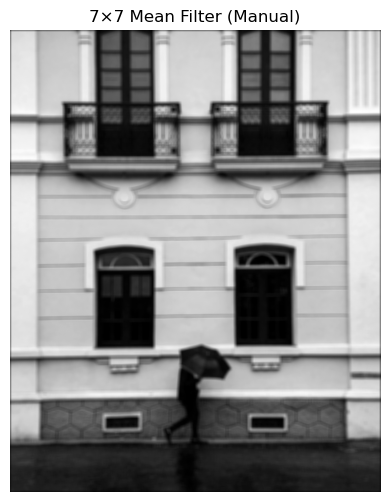

In [17]:
# Q3: Manual Mean Filter

# Load image in grayscale
img = cv2.imread('walking.jpg', cv2.IMREAD_GRAYSCALE)

# Get image dimensions
h, w = img.shape

# Define kernel size
k = 7
pad = k // 2

# Pad the image
padded_img = np.pad(img, pad, mode='constant', constant_values=0)

# Output image
filtered_img = np.zeros((h, w), dtype=np.uint8)

# Measure execution time
%time
for i in range(h):
    for j in range(w):
        window = padded_img[i:i+k, j:j+k]
        filtered_img[i, j] = np.mean(window)

# Display filtered image
plt.figure(figsize=(6, 6))
plt.title("7×7 Mean Filter (Manual)")
plt.imshow(filtered_img, cmap='gray')
plt.axis("off")
plt.show()

# Question 3: Execution Time Comparison (Timing Only)

In [18]:
%%time
for i in range(h):
    for j in range(w):
        window = padded_img[i:i+k, j:j+k]
        filtered_img[i, j] = np.mean(window)

CPU times: total: 4.55 s
Wall time: 4.65 s


**Note:** The execution time is relatively high because the filter is implemented manually using nested loops in Python.

## Q4: Filter Comparison
Apply the same 7×7 mean filter using:
1. `cv2.filter2D`
2. `scipy.signal.convolve2d`

Display all three results (manual, OpenCV, SciPy) side by side.  
**Question:** Compare the execution times and the output images. Why are there differences in the border regions?

CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 0 ns
Wall time: 0 ns


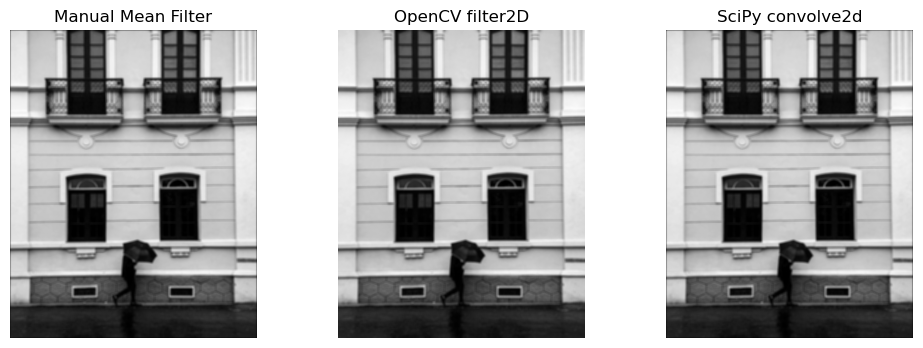

In [19]:
#Q4 Solution
from scipy.signal import convolve2d
# Load image in grayscale
img = cv2.imread('walking.jpg', cv2.IMREAD_GRAYSCALE)

# 7x7 mean kernel
k = 7
kernel = np.ones((k, k), dtype=np.float32) / (k * k)

# --- OpenCV filter2D ---
%time
opencv_result = cv2.filter2D(img, -1, kernel)

# --- SciPy convolve2d ---
%time
scipy_result = convolve2d(img, kernel, mode='same', boundary='fill', fillvalue=0)

# Convert SciPy result to uint8
scipy_result = np.clip(scipy_result, 0, 255).astype(np.uint8)

# --- Display results ---
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Manual Mean Filter")
plt.imshow(filtered_img, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("OpenCV filter2D")
plt.imshow(opencv_result, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("SciPy convolve2d")
plt.imshow(scipy_result, cmap='gray')
plt.axis("off")

plt.show()

# Q4: Execution Time Comparison (Timing Only)

### --- Manual Mean Filter ---

In [20]:
%%time
for i in range(h):
    for j in range(w):
        window = padded_img[i:i+k, j:j+k]
        filtered_img[i, j] = np.mean(window)

CPU times: total: 4.34 s
Wall time: 4.35 s


### --- OpenCV filter2D ---

In [21]:
%%time
opencv_result = cv2.filter2D(img, -1, kernel)

CPU times: total: 0 ns
Wall time: 2.64 ms


### --- SciPy convolve2d ---

In [22]:
%%time
scipy_result = convolve2d(img, kernel, mode='same', boundary='fill', fillvalue=0)

CPU times: total: 46.9 ms
Wall time: 49.2 ms


## Answer of Question 4 السؤال النظري

1- The **manual mean filter** has the **highest execution time** because it is implemented using nested Python loops, which are computationally expensive.

2- **cv2.filter2D** is the **fastest method since** it is optimized and implemented in C/C++.

3- **scipy.signal.convolve2d** has **intermediate performance**, faster than the manual method but slower than OpenCV.

### Notes
- The output images are visually similar in the central regions of the image.
- Differences appear near the border regions because each method handles image boundaries differently.
- The manual method and SciPy use zero padding, while OpenCV applies its own default border handling, which leads to slight variations at the edges.

## Q5: Horizontal & Vertical Edge Detection
Use the provided horizontal and vertical edge detection kernels. Apply each to `walking.jpg` separately using `convolve2d`. Combine the two results by adding them. Normalize the final image to `[0, 1]` and display it.  
**Question:** What types of edges (horizontal/vertical) are most visible in the image? Why?

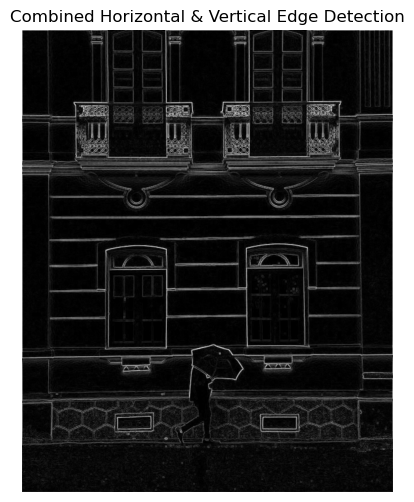

In [23]:
#Q5 Solution

# Load image in grayscale
walking = cv2.imread('walking.jpg', cv2.IMREAD_GRAYSCALE)

# Define kernels (from provided images)
kernel_vertical = np.float32([
    [ 1,  0, -1],
    [ 1,  0, -1],
    [ 1,  0, -1]
])

kernel_horizontal = np.float32([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

# Apply convolution
vertical_edges = np.abs(convolve2d(walking, kernel_vertical, mode='same', boundary='fill', fillvalue=0))
horizontal_edges = np.abs(convolve2d(walking, kernel_horizontal, mode='same', boundary='fill', fillvalue=0))

# Combine edges
combined_edges = vertical_edges + horizontal_edges

# Normalize to [0, 1]
combined_edges_norm = (combined_edges - combined_edges.min()) / (
    combined_edges.max() - combined_edges.min()
)

# Display result
plt.figure(figsize=(6, 6))
plt.title("Combined Horizontal & Vertical Edge Detection")
plt.imshow(combined_edges_norm, cmap='gray')
plt.axis("off")
plt.show()

## Q5 Answer الجزء النظري

**Vertical edges** are **the most visible** in the image.
This is because the scene contains many **strong vertical structures** such as window frames, doors, building columns, and the human figure.

The vertical edge detection kernel responds strongly to **intensity changes** along the horizontal direction, which highlights these vertical features.
Although horizontal edges are also present (such as floor lines and balcony edges), they are less dominant compared to the vertical ones.

<center>
    <h4>End of Assignment 4</h4>
</center>